This notebook creates models to classify artists based on their lyrics. Here, we will be comparing Legião Urbana vs Charlie Brown Junior and Legião Urbana vs Engenheiros do Havaí, some of the best known Brazilian rockbands for their good lyrics. Our goal is not model accuracy, but 1.probe linear separability; 2. understand most important features.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
from sklearn.datasets import load_files
import shutil
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.pipeline import make_pipeline
import mglearn
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

Makes folders for storing the txt files to be generated for every artist

In [2]:
if os.path.isdir('artists') == False:
    os.mkdir('artists') 
    
    
if os.path.isdir('artists/legiao_urbana_cbrj') == False:
    os.mkdir('artists/legiao_urbana_cbrj') 
    
if os.path.isdir('artists/legiao_urbana_cbrj/legiao_urbana') == False:
    os.mkdir('artists/legiao_urbana_cbrj/legiao_urbana') 
    
if os.path.isdir('artists/legiao_urbana_cbrj/cbrj') == False:
    os.mkdir('artists/legiao_urbana_cbrj/cbrj') 
    
    
if os.path.isdir('artists/legiao_urbana_engenheiros') == False:
    os.mkdir('artists/legiao_urbana_engenheiros') 
    
if os.path.isdir('artists/legiao_urbana_engenheiros/legiao_urbana') == False:
    os.mkdir('artists/legiao_urbana_engenheiros/legiao_urbana') 
    
if os.path.isdir('artists/legiao_urbana_engenheiros/engenheiros') == False:
    os.mkdir('artists/legiao_urbana_engenheiros/engenheiros') 

# Legião Urbana Most Played

Datascraping for retrieving the lyrics from online lyrics repository, in order of most played. We will be using only 70 most played song by artist, mostly avoiding covers then.

In [3]:
legiao_urbana_most_palyed = requests.get("https://www.letras.mus.br/legiao-urbana/mais-tocadas.html") 
#site with links leading to all songs by the band

In [4]:
content = legiao_urbana_most_palyed.content

In [5]:
soup_all_songs =  BeautifulSoup(content)
all_songs = soup_all_songs.find_all("a", "song-name") #all songs by the band with links
most_played = all_songs[:70]

In [6]:
links = []
for song in range(len(most_played)):
    links.append((most_played[song].text, "https://www.letras.mus.br"+most_played[song].get("href")))

In [7]:
list_of_lyrics = []

for song in range(len(links)):
    link = links[song][1] #take the link of the song
    request = requests.get(link) #request it
    c = request.content
    
    soup = BeautifulSoup(c)
    samples = soup.find_all("p") #isolate the part with actual lyrics
    
    lyrics = links[song][0] #take the title of the song and add it to the lyrics
    
    for part in range(len(samples)-3): #do not consider the last 3 parts of the lyrics, as they are website specific such as
                                        #"follow this artist", etc
        lyrics += "\n\n"
        lyrics += "\n".join(samples[part].strings)
    
    list_of_lyrics.append([links[song][0], lyrics]) #make the list of titles and lyrics

Example of the most played song of the artist

In [8]:
print(list_of_lyrics[0][1])

Tempo Perdido

Todos os dias quando acordo
Não tenho mais o tempo que passou
Mas tenho muito tempo
Temos todo o tempo do mundo

Todos os dias antes de dormir
Lembro e esqueço como foi o dia
Sempre em frente
Não temos tempo a perder

Nosso suor sagrado
É bem mais belo que esse sangue amargo
E tão sério

E selvagem
Selvagem
Selvagem

Veja o sol dessa manhã tão cinza
A tempestade que chega é da cor dos teus olhos castanhos

Então me abraça forte
Me diz mais uma vez que já estamos
Distantes de tudo

Temos nosso próprio tempo
Temos nosso próprio tempo
Temos nosso próprio tempo

Não tenho medo do escuro
Mas deixe as luzes
Acesas agora

O que foi escondido
É o que se escondeu
E o que foi prometido
Ninguém prometeu
Nem foi tempo perdido

Somos tão jovens
Tão jovens
Tão jovens


Save the lyrics in folder by artist to allow for using sklearn.datasets.load_files

In [9]:
for song in  list_of_lyrics:   
    f = open('artists/legiao_urbana_cbrj/legiao_urbana/'+song[0]+'.txt', "w",  encoding='utf-8') # the w means WRITING
    g = open('artists/legiao_urbana_engenheiros/legiao_urbana/'+song[0]+'.txt', "w", encoding='utf-8')
    #now we gotta write something

    f.write(song[1]) 
    g.write(song[1])
    f.close()
    g.close()

# Charlie Brown Junior Most Played

In [10]:
cbjr_most_palyed = requests.get("https://www.letras.mus.br/charlie-brown-jr/mais-tocadas.html") 
#site with links leading to all songs by the band

In [11]:
content = cbjr_most_palyed.content

In [12]:
soup_all_songs =  BeautifulSoup(content)
all_songs = soup_all_songs.find_all("a", "song-name") #all songs by the band with links
most_played = all_songs[:70]

In [13]:
links = []
for song in range(len(most_played)):
    links.append((most_played[song].text, "https://www.letras.mus.br"+most_played[song].get("href")))

In [14]:
list_of_lyrics = []

for song in range(len(links)):
    link = links[song][1] #take the link of the song
    request = requests.get(link) #request it
    c = request.content
    
    soup = BeautifulSoup(c)
    samples = soup.find_all("p") #isolate the part with actual lyrics
    
    lyrics = links[song][0] #take the title of the song and add it to the lyrics
    
    for part in range(len(samples)-3): #do not consider the last 3 parts of the lyrics, as they are website specific such as
                                        #"follow this artist", etc
        lyrics += "\n\n"
        lyrics += "\n".join(samples[part].strings)
    
    list_of_lyrics.append([links[song][0], lyrics]) #make the list of titles and lyrics

In [15]:
print(list_of_lyrics[0][1])

Céu Azul

Tão natural quanto a luz do dia
Mas que preguiça boa
Me deixa aqui à toa
Hoje ninguém vai estragar meu dia
Só vou gastar energia pra beijar sua boca

Fica comigo então
Não me abandona, não
Alguém te perguntou como é que foi seu dia?
Uma palavra amiga, uma notícia boa
Isso faz falta no dia a dia
A gente nunca sabe quem são essas pessoas

Eu só queria te lembrar
Que aquele tempo eu não podia fazer mais por nós
Eu estava errado e você não tem que me perdoar

Mas também quero te mostrar
Que existe um lado bom nessa história
Tudo que ainda temos a compartilhar

E viver
E cantar
Não importa qual seja o dia
Vamos viver
Vadiar
O que importa é nossa alegria

Vamos viver
E cantar
Não importa qual seja o dia
Vamos viver
Vadiar
O que importa é nossa alegria

Tão natural quanto a luz do dia
Mas que preguiça boa
Me deixa aqui à toa
Hoje ninguém vai estragar meu dia
Só vou gastar energia pra beijar sua boca

Eu só queria te lembrar
Que aquele tempo eu não podia fazer mais por nós
Eu estava 

In [16]:
for song in  list_of_lyrics:   
    f = open('artists/legiao_urbana_cbrj/cbrj/'+song[0]+'.txt', "w", encoding='utf-8')

    f.write(song[1]) 
    f.close()

# Engenheiros do Havaí

In [17]:
engenheiros_most_palyed = requests.get("https://www.letras.mus.br/engenheiros-do-hawaii/mais-tocadas.html") 
#site with links leading to all songs by the band

In [18]:
content = engenheiros_most_palyed.content

In [19]:
soup_all_songs =  BeautifulSoup(content)
all_songs = soup_all_songs.find_all("a", "song-name") #all songs by the band with links
most_played = all_songs[:70]

In [20]:
links = []
for song in range(len(most_played)):
    links.append((most_played[song].text.replace('/',' '), "https://www.letras.mus.br"+most_played[song].get("href")))
    #replaces / by a space as some lyrics names have /, which spoils os

In [21]:
list_of_lyrics = []

for song in range(len(links)):
    link = links[song][1] #take the link of the song
    request = requests.get(link) #request it
    c = request.content
    
    soup = BeautifulSoup(c)
    samples = soup.find_all("p") #isolate the part with actual lyrics
    
    lyrics = links[song][0] #take the title of the song and add it to the lyrics
    
    for part in range(len(samples)-3): #do not consider the last 3 parts of the lyrics, as they are website specific such as
                                        #"follow this artist", etc
        lyrics += "\n\n"
        lyrics += "\n".join(samples[part].strings)
    
    list_of_lyrics.append([links[song][0], lyrics]) #make the list of titles and lyrics

In [22]:
print(list_of_lyrics[0][1])

Pra Ser Sincero

Pra ser sincero
Não espero de você
Mais do que educação
Beijo sem paixão
Crime sem castigo
Aperto de mãos
Apenas bons amigos

Pra ser sincero
Não espero que você
Minta
Não se sinta capaz
De enganar
Quem não engana
A si mesmo

Nós dois temos
Os mesmos defeitos
Sabemos tudo
A nosso respeito
Somos suspeitos
De um crime perfeito
Mas crimes perfeitos
Não deixam suspeitos

Pra ser sincero
Não espero de você
Mais do que educação
Beijo sem paixão
Crime sem castigo
Aperto de mãos
Apenas bons amigos

Pra ser sincero
Não espero que você
Me perdoe
Por ter perdido a calma
Por ter vendido a alma
Ao diabo

Um dia desses
Num desses
Encontros casuais
Talvez a gente
Se encontre
Talvez a gente
Encontre explicação

Um dia desses
Num desses
Encontros casuais
Talvez eu diga
Minha amiga
Pra ser sincero
Prazer em vê-la
Até mais

Nós dois temos
Os mesmos defeitos
Sabemos tudo
A nosso respeito
Somos suspeitos
De um crime perfeito
Mas crimes perfeitos
Não deixam suspeitos


In [23]:
for song in  list_of_lyrics:   
    f = open('artists/legiao_urbana_engenheiros/engenheiros/'+song[0]+'.txt', "w", encoding='utf-8')

    f.write(song[1]) 
    f.close()

# Logistic Regression Legião CBJr

Let us start with a logistic regression, for simplicity

In [24]:
songs = load_files("artists/legiao_urbana_cbrj")
data, label = songs.data, songs.target
print("type of text_train: {}".format(type(data)))
print("length of text_train: {}".format(len(data)))
print("text_train[1]:\n{}".format(data[1].decode("utf-8")))

type of text_train: <class 'list'>
length of text_train: 139
text_train[1]:
Eduardo e Mônica

Quem um dia irá dizer
Que existe razão
Nas coisas feitas pelo coração?
E quem irá dizer
Que não existe razão?

Eduardo abriu os olhos, mas não quis se levantar
Ficou deitado e viu que horas eram
Enquanto Mônica tomava um conhaque
No outro canto da cidade, como eles disseram

Eduardo e Mônica um dia se encontraram sem querer
E conversaram muito mesmo pra tentar se conhecer
Um carinha do cursinho do Eduardo que disse
Tem uma festa legal, e a gente quer se divertir

Festa estranha, com gente esquisita
Eu não tô legal, não aguento mais birita
E a Mônica riu, e quis saber um pouco mais
Sobre o boyzinho que tentava impressionar
E o Eduardo, meio tonto, só pensava em ir pra casa
É quase duas, eu vou me ferrar

Eduardo e Mônica trocaram telefone
Depois telefonaram e decidiram se encontrar
O Eduardo sugeriu uma lanchonete
Mas a Mônica queria ver o filme do Godard

Se encontraram, então, no Parque da Ci

In [25]:
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(data, label)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.86


Score not so good, but we can easily visualize most important features

In [26]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset
X_train = vectorizer.transform(data)
# find maximum value for each of the features over the dataset
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())

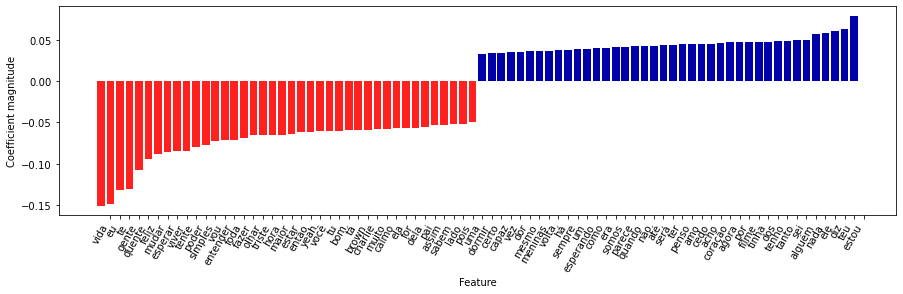

In [27]:
mglearn.tools.visualize_coefficients(
grid.best_estimator_.named_steps["logisticregression"].coef_,
feature_names, n_top_features=40)

# Perceptron Legião CBJr

A perceptron, however, allows for perfect accuracy, indicating that, indeed, the dataset is linear separable

In [28]:
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
Perceptron(tol=1e-3, random_state=0))
pipe.fit(data, label)
pipe.score(data, label)

1.0

# Random Forest Legião CBJr

We apply a random forest, which increases accuracy, but allows for good importance visualization. However, we loose linearity of the model

In [29]:
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
RandomForestClassifier(random_state=0))
pipe.fit(data, label)
pipe.score(data, label)

1.0

<AxesSubplot:title={'center':'Feature Importance'}>

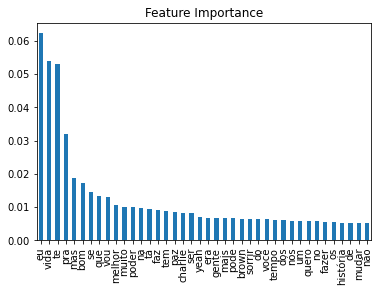

In [30]:
importances = pipe[1].feature_importances_
std = np.std([
    tree.feature_importances_ for tree in pipe[1].estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)
biggest_features = forest_importances.nlargest(40)
biggest_features.plot(x='Team', kind='bar', stacked=True,
        title='Feature Importance')

# Logistic Regression Legião Engenheiros

In [31]:
songs = load_files("artists/legiao_urbana_engenheiros")
data, label = songs.data, songs.target
print("type of text_train: {}".format(type(data)))
print("length of text_train: {}".format(len(data)))
print("text_train[1]:\n{}".format(data[1].decode("utf-8")))

type of text_train: <class 'list'>
length of text_train: 139
text_train[1]:
Eduardo e Mônica

Quem um dia irá dizer
Que existe razão
Nas coisas feitas pelo coração?
E quem irá dizer
Que não existe razão?

Eduardo abriu os olhos, mas não quis se levantar
Ficou deitado e viu que horas eram
Enquanto Mônica tomava um conhaque
No outro canto da cidade, como eles disseram

Eduardo e Mônica um dia se encontraram sem querer
E conversaram muito mesmo pra tentar se conhecer
Um carinha do cursinho do Eduardo que disse
Tem uma festa legal, e a gente quer se divertir

Festa estranha, com gente esquisita
Eu não tô legal, não aguento mais birita
E a Mônica riu, e quis saber um pouco mais
Sobre o boyzinho que tentava impressionar
E o Eduardo, meio tonto, só pensava em ir pra casa
É quase duas, eu vou me ferrar

Eduardo e Mônica trocaram telefone
Depois telefonaram e decidiram se encontrar
O Eduardo sugeriu uma lanchonete
Mas a Mônica queria ver o filme do Godard

Se encontraram, então, no Parque da Ci

In [32]:
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(data, label)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.78


In [33]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset
X_train = vectorizer.transform(data)
# find maximum value for each of the features over the dataset
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())

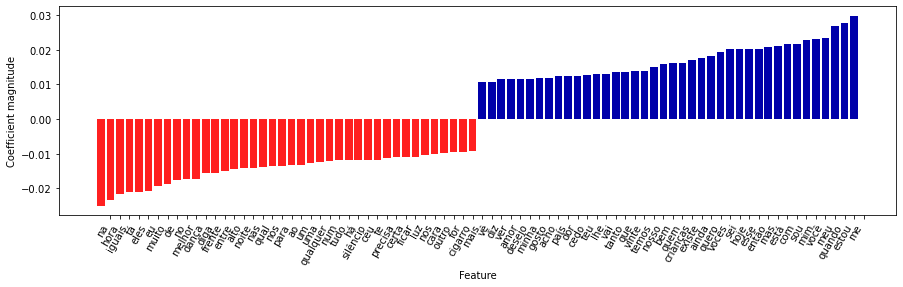

In [34]:
mglearn.tools.visualize_coefficients(
grid.best_estimator_.named_steps["logisticregression"].coef_,
feature_names, n_top_features=40)

# Perceptron Legião Urbana Engenheiros

In [35]:
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
Perceptron(tol=1e-3, random_state=0))
pipe.fit(data, label)
pipe.score(data, label)

1.0

# Random Forest Legião CBJr

In [36]:
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
RandomForestClassifier(random_state=0))
pipe.fit(data, label)
pipe.score(data, label)

1.0

<AxesSubplot:title={'center':'Feature Importance'}>

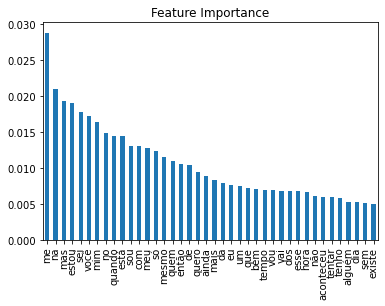

In [37]:
importances = pipe[1].feature_importances_
std = np.std([
    tree.feature_importances_ for tree in pipe[1].estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)
biggest_features = forest_importances.nlargest(40)
biggest_features.plot(x='Team', kind='bar', stacked=True,
        title='Feature Importance')

# Clear Folders

In [38]:
shutil.rmtree('artists')